# 1. Data cleaning

##  Twee gegevensreeksen inlezen en samenvoegen

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#read the datasets 
df = pd.read_csv("steps.csv", sep=";")
df1 = pd.read_csv("survey.csv", sep=',')

#merge the datasets 
Data = pd.merge(df1, df, how='right', on='id')

Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## De gegevens opschonen: onmogelijke waarden verwijderen  

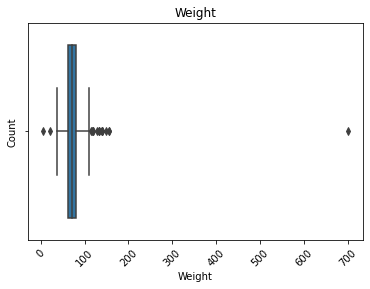

In [4]:
sns.boxplot(x="weight", data=Data)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [5]:
Data["weight"]=Data["weight"].replace(700,np.nan)

In [6]:
Data["mean"]=Data.iloc[:,9:336].mean(axis=1)
Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [7]:
Data['BMI']=Data["weight"]/(Data["height"]/100)**2
Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


# 3. Verkennende gegevensanalyse

In [11]:
Data=Data[Data["mean"]<75000]
print('Median = '+str(Data["mean"].median()))
print('Mean = '+str(Data["mean"].mean()))
print('St Dev. = '+str(Data["mean"].std()))

Median = 6244.931601731601
Mean = 6825.928380530858
St Dev. = 3696.491961554726


### Scatterplot matrix van de numerieke variabelen 

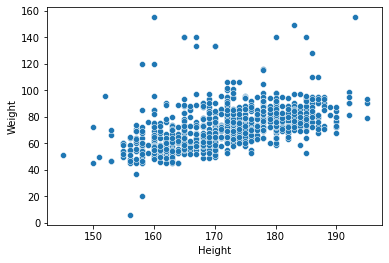

In [18]:
Scatterplot = sns.scatterplot(x= "height", y="weight", data=Data)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### Correlatiematrix van de numerieke variabelen

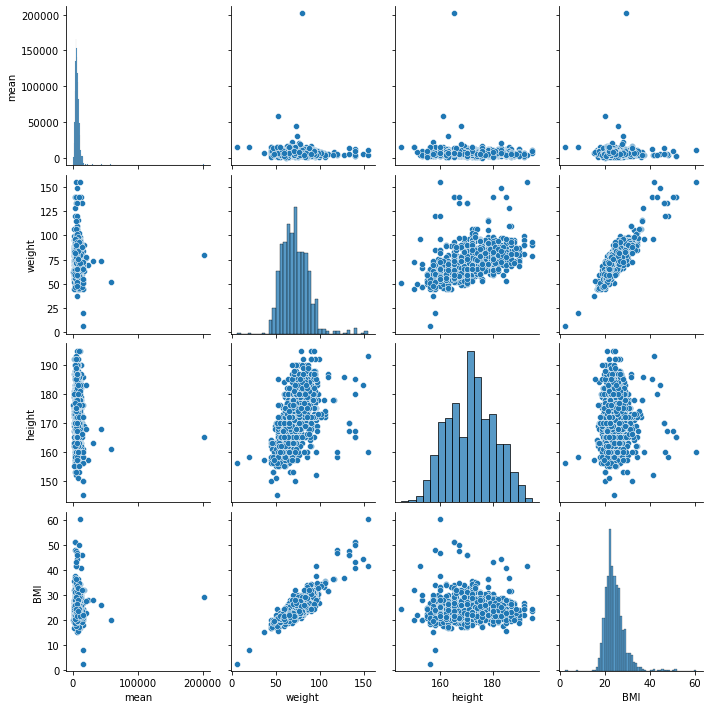

In [8]:
Data_sub = Data[["mean", "weight", "height", "BMI"]]
sns.pairplot(Data_sub)
plt.show()

In [9]:
corr = Data_sub.corr()
corr

,mean,weight,height,BMI
mean,1.000000,-0.028636,-0.069667,0.007605
weight,-0.028636,1.000000,0.513935,0.871410
height,-0.069667,0.513935,1.000000,0.037571
BMI,0.007605,0.871410,0.037571,1.000000


BMI is berekend op basis van het gewicht en hoogte waardoor het niet raar is dat er tussen deze variabelen een verband zit. Daarnaast zit er geen verband tussen het gemiddeld aantal stappen en hoogte of gewicht 